In [170]:
import pandas as pd
import stock_data.fill_data as fd
import stock_data.models as models
import datetime as dt
import talib

In [195]:
# symbol = "CANE"
# start_date, end_date = dt.date(2023, 1, 1), dt.date(2023, 10, 31)
# interest_start = dt.date(2023, 7, 1)
# interest_end = dt.date(2023, 8, 31)

In [218]:
symbol = "ACRE"
start_date, end_date = dt.date(2024, 1, 1), dt.date(2024, 6, 29)
interest_start = dt.date(2024, 5, 31)
interest_end = end_date

In [196]:
# Load the data
# range of interest is 2023-07-03 - 2023-8-31
with fd.open_session() as session:
  fd.fill_stock_data(session, symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [219]:
from sqlalchemy import and_, asc

with (fd.open_session() as session):
  results = session.query(models.Stock.date, models.Stock.open, models.Stock.close, models.Stock.high, models.Stock.low).filter(and_(models.Stock.symbol == symbol, models.Stock.date > start_date, models.Stock.date < end_date)).order_by(asc(models.Stock.date)).all()
  
prices = pd.DataFrame.from_dict(results)
prices

,date,open,close,high,low
0,2024-01-02,10.33,10.24,10.39,10.20
1,2024-01-03,10.11,9.97,10.11,9.93
2,2024-01-04,10.00,10.02,10.12,9.93
3,2024-01-05,9.98,10.06,10.22,9.97
4,2024-01-08,10.08,10.23,10.24,10.01
...,...,...,...,...,...
119,2024-06-24,7.22,7.13,7.22,7.08
120,2024-06-25,7.13,7.01,7.17,7.01
121,2024-06-26,6.99,7.10,7.12,6.94
122,2024-06-27,7.15,6.67,7.15,6.58


In [220]:
ema_history = 20
prices['ema30'] = talib.EMA(prices.close, 30)
prices['ema30Slope'] = (prices.ema30 - prices.ema30.shift(ema_history))/(ema_history + 1)
prices['std30'] = talib.STDDEV(prices.close, 30)
prices['std3030'] = talib.STDDEV(prices.ema30, ema_history)
prices['cv'] = prices['std3030']/prices['ema30'] * 100

<Axes: >

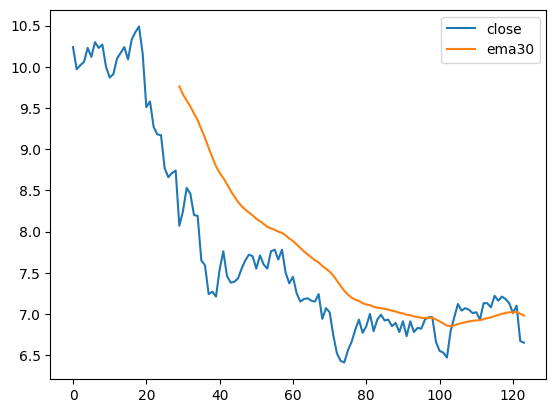

In [221]:
prices[ ['close', 'ema30']].plot()

<Axes: >

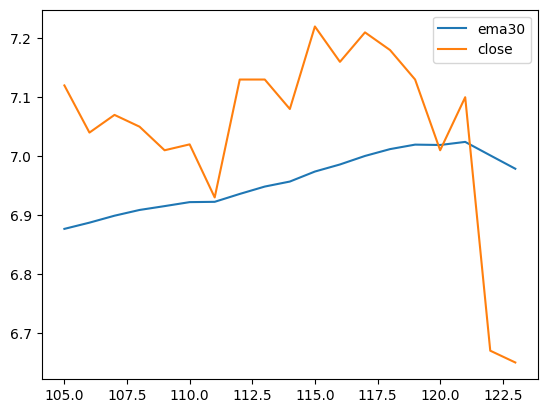

In [222]:
date_filter = (prices.date > interest_start) & (prices.date < interest_end)
prices.loc[date_filter, ['ema30', 'close']].plot()

<Axes: >

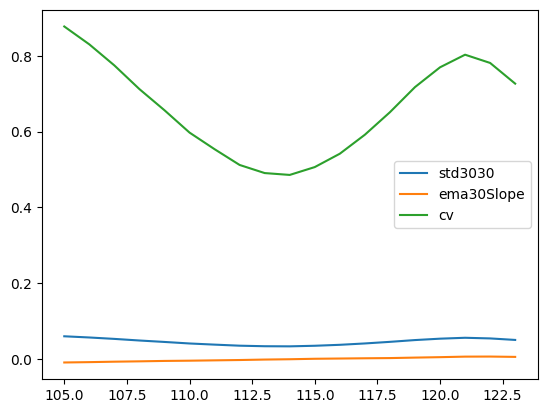

In [223]:
prices.loc[date_filter, ['std3030', 'ema30Slope', 'cv'] ].plot()

In [225]:
prices.loc[prices.date < interest_start, ['std3030', 'ema30Slope', 'cv'] ]

,std3030,ema30Slope,cv
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
99,0.056181,-0.009439,0.810317
100,0.055954,-0.009752,0.809934
101,0.056732,-0.010567,0.824111
102,0.059911,-0.010868,0.873675
